In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [2]:
x = np.random.rand(200) * 100
y = np.random.rand(200) * 100
z = np.random.randint(200, size=200) 

sim = np.stack([x,y,z], axis=1)

In [6]:
x = x.astype('float32')
y = y.astype('float32')
z = z.astype('int16')

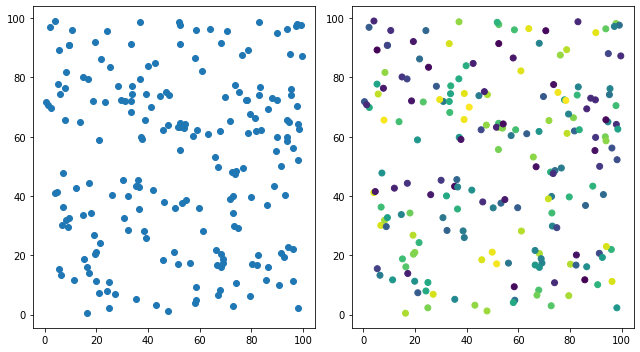

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (9,5))
ax[0].scatter(x,y)
ax[1].scatter(x,y,c=z)
plt.tight_layout()
plt.show()

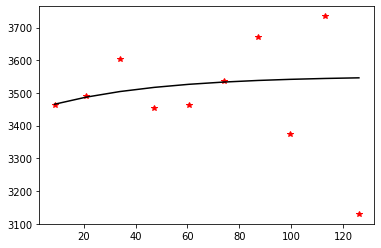

In [110]:
ok = OrdinaryKriging(x, y, z, variogram_model='exponential', nlags=10, weight=True, enable_statistics=True)
ok.display_variogram_model()

In [70]:
ok.get_statistics()

(0.021390405231988985, 1.0034905967061758, 3620.4092223957077)

In [75]:
ok.get_variogram_points()[1]

array([3459.04627304, 3496.7980513 , 3524.50069889, 3543.32141432,
       3555.83764658, 3563.87084311, 3569.3885775 , 3572.91656649])

In [23]:
Z, ss = ok.execute('grid', np.arange(0, 100, 1.), np.arange(0, 100, 1.))

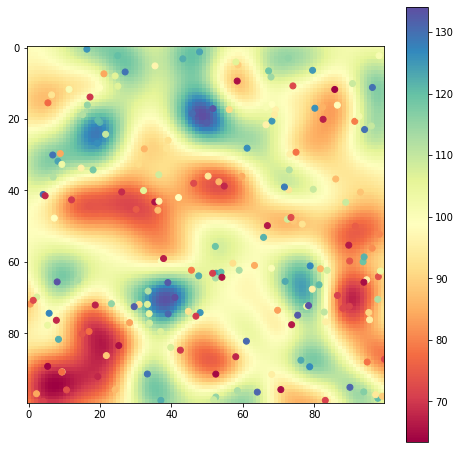

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(x,y, c = z, cmap='Spectral')
plt.imshow(Z, cmap='Spectral')
plt.colorbar()
plt.show()

In [123]:
import pandas as pd

In [130]:
subset = pd.DataFrame(sim).sample(n= 100).values

In [143]:
ok2 = OrdinaryKriging(subset[:,0], subset[:,1], subset[:,2], variogram_model='exponential')

In [146]:
Z1, ss1 = ok2.execute('grid', np.arange(0,100, 1.), np.arange(0, 100, 1.))

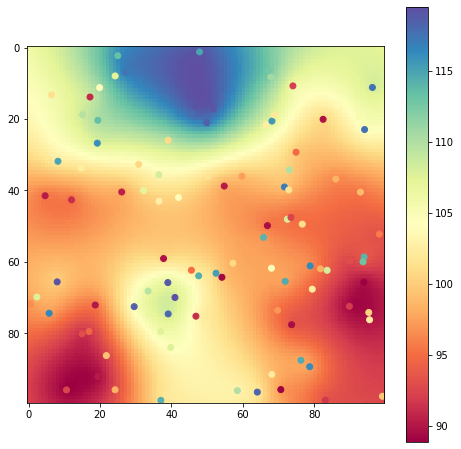

In [147]:
plt.figure(figsize=(8,8))
plt.scatter(subset[:,0],subset[:,1], c = subset[:,2], cmap='Spectral')
plt.imshow(Z1, cmap='Spectral')
plt.colorbar()
plt.show()